## CDades Sprint 3 Tasca 2

### **Exercici 1**
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.

In [50]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_retrasos = pd.read_csv("C:/IT Academy/Sprint 3 Programació numèrica, dataframes i anàlisi estadístic/DelayedFlights.csv/DelayedFlights.csv")
print(df_retrasos.info())  # información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

#### Tenemos un data set con 200.000 registros y 30 variables, de ellas 5 son variables categóricas, 4 variables de fecha/hora y el resto numéricas discretas.  
##### Nuestras variables son:  
Year, Month, DayofMonth, DayOfWeek: variables de fecha/hora  
DepTime: hora de salida real  
CRSDepTime: hora de salida programada  
ArrTime: hora de llegada real  
CRSArrTime: hora de llegada programada  
UniqueCarrier: código de la compañía aérea  
TailNum: identificador del vuelo  
ActualElapsedTime: tiempo de retraso en minutos  
CRSElapsedTime: tiempo de retraso programado en minutos  
AirTime: tiempo de vuelo en minutos  
ArrDelay: tiempo de retraso, un vuelo se considera retrasado cuando el retraso es mayor de 15 minutos  
DepDelay: retraso en la salida  
Origin: código del aeropuerto de origen  
Dest: código del aeropuerto de destino  
Distance: distancia en millas  
TaxiIn: tiempo de deslazamiento hasta el avión, en minutos  
TaxiOut: tiempo de desplazamiento desde el avión, en minutos  
Cancelled: el vuelo fue cancelado  
CancellationCode: código de cancelación  
Diverted, vuelo desviado, 1 = sí, 0 = no  
CarrierDelay: retraso por la preparación del vuelo, en minutos  
WeatherDelay: retraso por la condiciones metereológicas, en minutos  
NASDelay: retraso por control aéreo, en minutos  
SecurityDelay: retraso por la operaciones de seguridad, en minutos  
LateAircraftDelay: retraso debido al vuelo anterior, en minutos

#### Filtrado del dataset
En este dataset vamos a centrarnos en estudiar los retrasos. Con esta premisa empezamos eliminando los vuelos cancelados y desviados, y aquellos que tengan un retraso menor de quince minutos que no se contemplan como retrasados.
También reduciremos los registros del dataset a 200.000 como indica el ejercicio. No nos limitaremos a tomar los primeros porque la muestra no queda equilibrada en las variables de fecha, por lo que ordenaremos en dataset en función del tiempo de retraso y tomaremos los registros con más retraso.
En ningú momento eliminamos registros, sólo filtramos.

In [4]:
NoCancelled = df_retrasos['Cancelled'] == False
df_retrasosCan = df_retrasos[NoCancelled] # Filtramos los vuelos cancelados

In [10]:
NoDiverted = df_retrasosCan['Diverted'] == 0
df_retrasosCanDiv = df_retrasosCan[NoDiverted] # Filtramos los vuelos desviados
df_retrasosCanDiv.columns # visualizamos el nombre de las columnas para facilitarnos el acceso

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [13]:
df_retrasosCD = df_retrasosCanDiv.loc[:,['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']] # Filtramos las columnas que no necesitamos 'Cancelled', 'CancellationCode', 'Diverted'

In [14]:
delay15 = df_retrasosCD['ArrDelay'] > 15 
df_retrasos15 = df_retrasosCD[delay15] # Filtramos los vuelos con retrasos superiores a quince minutos
df_retrasos15S = df_retrasos15.sort_values(['ArrDelay'],ascending=False) # Ordenamos los vuelos para tener los más retrasados
df_retrasos15SR = df_retrasos15S[0:200000]  # Reducción del dataset a 200.000 registros

In [15]:
df_retrasos15SR.head() # muestra del dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
322516,1018798,2008,2,3,7,1117.0,1820,2256.0,555,NW,...,HNL,MSP,3972,6.0,16.0,1455.0,0.0,4.0,0.0,1002.0
686014,2235378,2008,4,10,4,724.0,1417,858.0,1605,NW,...,CLT,MSP,930,8.0,14.0,2436.0,0.0,0.0,0.0,17.0
839306,2832617,2008,5,6,2,2.0,1530,254.0,1823,NW,...,RSW,DTW,1085,10.0,17.0,1951.0,0.0,0.0,0.0,0.0
1009553,3387883,2008,6,20,5,2140.0,1710,2252.0,1825,MQ,...,LIT,DFW,304,6.0,16.0,1707.0,0.0,0.0,0.0,0.0
1881639,6857047,2008,12,19,5,1602.0,1325,1921.0,1546,NW,...,BOS,MSP,1124,8.0,59.0,1307.0,0.0,58.0,0.0,290.0


In [16]:
df_retrasos15SR.columns # visualizamos el nombre de las columnas para facilitarnos el acceso

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

#### Primera reducción del dataset
Vemos también que, aunque todos los datos aportan información, en este ejercicio filtraremos algunas variables con las que no vamos a trabajar ahora.  
De entrada no nos aportan información relevante sobre los retrasos los datos que identifican un vuelo o un avión: 'FlightNum' (número de vuelo) y 'TailNum' (número de cola) ni las horas programadas y reales de salida o llegada, 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', porque el retraso resultante ya lo tenemos en las columnas 'ArrDelay' y 'ArrDelay'.

In [17]:
df_retrasos15Red1 = df_retrasos15SR.loc[:,['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
df_retrasos15Red1.columns # comprobamos que en nuestro nuevo dataset ya no aparecen esas columnas

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

#### Segunda reducción del dataset
Agrupamos las columnas de fecha en una sola, reducimos a un nuevo dataset, filtramos columnas y ordenamos

In [18]:
fecha = df_retrasos15Red1['Year'].astype(str) + '-' +  df_retrasos15Red1['Month'].astype(str) + '-' + df_retrasos15Red1['DayofMonth'].astype(str)
df_retrasos15Red1['Date'] = pd.to_datetime(fecha).dt.strftime('%Y-%m-%d') # le damos formato de fecha
df_retrasos15Red1.columns # comprobamos que en el dataset aparecen columna date
df_retrasos15Red2 = df_retrasos15Red1.loc[:,['Unnamed: 0', 'Date', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']]  # nuevo dataset eliminando columnas de fechas y reordenando la columna 'Date'
df_retrasos15Red2.head()

,Unnamed: 0,Date,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
322516,1018798,2008-02-03,NW,459.0,455.0,437.0,2461.0,2457.0,HNL,MSP,3972,6.0,16.0,1455.0,0.0,4.0,0.0,1002.0
686014,2235378,2008-04-10,NW,154.0,168.0,132.0,2453.0,2467.0,CLT,MSP,930,8.0,14.0,2436.0,0.0,0.0,0.0,17.0
839306,2832617,2008-05-06,NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,10.0,17.0,1951.0,0.0,0.0,0.0,0.0
1009553,3387883,2008-06-20,MQ,72.0,75.0,50.0,1707.0,1710.0,LIT,DFW,304,6.0,16.0,1707.0,0.0,0.0,0.0,0.0
1881639,6857047,2008-12-19,NW,259.0,201.0,192.0,1655.0,1597.0,BOS,MSP,1124,8.0,59.0,1307.0,0.0,58.0,0.0,290.0


#### Tercera reducción del dataset
Analizamos las columnas de tiempo para ver si tienen correlación entre ellas, si es así haremos un nuevo dataset reducido filtrando las que no sean necesarias

In [19]:
# Hacemos un dataset reducido de las columnas relacionadas con el tiempo de retraso
df_causasRetrasos = df_retrasos15Red2[['ArrDelay','AirTime','ActualElapsedTime','CRSElapsedTime', 'DepDelay' , 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay' , 'LateAircraftDelay']]
print(df_causasRetrasos.info()) # comprobamos que el dataset se ha generado bien
df_causasRetrasos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 322516 to 41356
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ArrDelay           200000 non-null  float64
 1   AirTime            200000 non-null  float64
 2   ActualElapsedTime  200000 non-null  float64
 3   CRSElapsedTime     200000 non-null  float64
 4   DepDelay           200000 non-null  float64
 5   TaxiIn             200000 non-null  float64
 6   TaxiOut            200000 non-null  float64
 7   CarrierDelay       200000 non-null  float64
 8   WeatherDelay       200000 non-null  float64
 9   NASDelay           200000 non-null  float64
 10  SecurityDelay      200000 non-null  float64
 11  LateAircraftDelay  200000 non-null  float64
dtypes: float64(12)
memory usage: 19.8 MB
None


,ArrDelay,AirTime,ActualElapsedTime,CRSElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
322516,2461.0,437.0,459.0,455.0,2457.0,6.0,16.0,1455.0,0.0,4.0,0.0,1002.0
686014,2453.0,132.0,154.0,168.0,2467.0,8.0,14.0,2436.0,0.0,0.0,0.0,17.0
839306,1951.0,145.0,172.0,173.0,1952.0,10.0,17.0,1951.0,0.0,0.0,0.0,0.0
1009553,1707.0,50.0,72.0,75.0,1710.0,6.0,16.0,1707.0,0.0,0.0,0.0,0.0
1881639,1655.0,192.0,259.0,201.0,1597.0,8.0,59.0,1307.0,0.0,58.0,0.0,290.0


Analizamos la correlación existente
Observamos que 'ArrDelay' está relacionada con 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay', son suma directa
Observamos que 'ActualElapsedTime' está relacionada con 'AirTime', 'TaxiIn', 'TaxiOut', son suma directa

In [89]:
df_causasRetrasos.corr()  

,ArrDelay,AirTime,ActualElapsedTime,CRSElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelay,1.000000,0.040238,0.058309,0.041750,0.928173,0.059802,0.040715,0.502646,0.204565,0.155462,-0.000613,0.183630
AirTime,0.040238,1.000000,0.920378,0.975691,0.011028,0.019723,0.061000,0.037155,-0.037880,0.026088,0.009130,-0.001858
ActualElapsedTime,0.058309,0.920378,1.000000,0.908331,-0.097532,0.141595,0.427778,-0.018375,-0.015270,0.190653,0.006288,-0.073673
CRSElapsedTime,0.041750,0.975691,0.908331,1.000000,0.042942,0.022032,0.086400,0.045470,-0.039925,0.002281,0.009596,0.011709
DepDelay,0.928173,0.011028,-0.097532,0.042942,1.000000,-0.051643,-0.272324,0.528914,0.174718,-0.020879,0.001616,0.248889
TaxiIn,0.059802,0.019723,0.141595,0.022032,-0.051643,1.000000,0.011887,-0.055914,0.008980,0.224572,-0.005055,-0.071663
TaxiOut,0.040715,0.061000,0.427778,0.086400,-0.272324,0.011887,1.000000,-0.120940,0.047271,0.377831,-0.003451,-0.170668
CarrierDelay,0.502646,0.037155,-0.018375,0.045470,0.528914,-0.055914,-0.120940,1.000000,-0.134690,-0.257915,-0.011532,-0.349138
WeatherDelay,0.204565,-0.037880,-0.015270,-0.039925,0.174718,0.008980,0.047271,-0.134690,1.000000,-0.085550,-0.006429,-0.166173
NASDelay,0.155462,0.026088,0.190653,0.002281,-0.020879,0.224572,0.377831,-0.257915,-0.085550,1.000000,-0.011550,-0.346958


En la correlación no se refleja pero analizando el dataset vemos que la columna 'SecurityDelay' también forma parte de la columna 'ArrDelay'
Tomamos una pate del dataset donde se ven valores de 'SecurityDelay'

In [21]:
df_causasRetrasos.loc[df_causasRetrasos.loc[:,'SecurityDelay'] > 0]

,ArrDelay,AirTime,ActualElapsedTime,CRSElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1776773,441.0,127.0,148.0,155.0,448.0,7.0,14.0,0.0,0.0,0.0,15.0,426.0
656467,392.0,104.0,121.0,134.0,405.0,6.0,11.0,0.0,0.0,0.0,392.0,0.0
1497738,357.0,90.0,112.0,135.0,380.0,10.0,12.0,0.0,0.0,0.0,357.0,0.0
922049,333.0,144.0,237.0,184.0,280.0,14.0,79.0,0.0,0.0,53.0,280.0,0.0
1582794,333.0,71.0,94.0,96.0,335.0,4.0,19.0,140.0,0.0,0.0,193.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
275982,105.0,98.0,118.0,120.0,107.0,5.0,15.0,0.0,0.0,0.0,54.0,51.0
1143741,105.0,87.0,103.0,110.0,112.0,4.0,12.0,0.0,0.0,0.0,105.0,0.0
202279,104.0,52.0,116.0,50.0,38.0,5.0,59.0,0.0,0.0,66.0,7.0,31.0
1786486,104.0,82.0,110.0,116.0,110.0,5.0,23.0,0.0,0.0,0.0,104.0,0.0


In [22]:
# nuevo dataset eliminando columnas de tiempo que no son necesarias
df_retrasos15Red3 = df_retrasos15Red2.loc[:,['Unnamed: 0', 'Date', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance']]

### **Exercici 2**
Fes un informe complet del dataset:
Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
Troba quantes dades faltants hi ha per columna.
Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
Fes una taula de les aerolínies amb més endarreriments acumulats.
Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
Aporta allò que consideris rellevant.

#### Información del data set

In [23]:
df_retrasos15Red3.head(10)

,Unnamed: 0,Date,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
322516,1018798,2008-02-03,NW,459.0,455.0,2461.0,2457.0,HNL,MSP,3972
686014,2235378,2008-04-10,NW,154.0,168.0,2453.0,2467.0,CLT,MSP,930
839306,2832617,2008-05-06,NW,172.0,173.0,1951.0,1952.0,RSW,DTW,1085
1009553,3387883,2008-06-20,MQ,72.0,75.0,1707.0,1710.0,LIT,DFW,304
1881639,6857047,2008-12-19,NW,259.0,201.0,1655.0,1597.0,BOS,MSP,1124
1497823,5232546,2008-09-01,NW,102.0,71.0,1583.0,1552.0,OMA,MSP,282
685437,2232494,2008-04-27,NW,84.0,87.0,1542.0,1545.0,MOT,MSP,449
163379,527950,2008-01-05,AA,292.0,42.0,1525.0,1275.0,EGE,MIA,1811
1214839,4061361,2008-07-16,NW,185.0,193.0,1510.0,1518.0,SEA,MSP,1399
521096,1634129,2008-03-21,NW,66.0,66.0,1490.0,1490.0,BNA,MEM,200


In [24]:
print(df_retrasos15Red3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 322516 to 41356
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Date               200000 non-null  object 
 2   UniqueCarrier      200000 non-null  object 
 3   ActualElapsedTime  200000 non-null  float64
 4   CRSElapsedTime     200000 non-null  float64
 5   ArrDelay           200000 non-null  float64
 6   DepDelay           200000 non-null  float64
 7   Origin             200000 non-null  object 
 8   Dest               200000 non-null  object 
 9   Distance           200000 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 16.8+ MB
None


#### Análisis de valores nulos o duplicados

In [94]:
df_retrasos15Red3.isnull().sum()  # Analizamos si tenemos valores nulos en el dataset

Unnamed: 0           0
Date                 0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
dtype: int64

In [26]:
df_retrasos15Red3.duplicated().sum()  # Analizamos si tenemos valores duplicados en el dataset

0

#### Informe del dataset
Tenemos un data set con 200.000 registros y 10 variables, de ellas 3 son variables categóricas, 1 variables de fecha/hora y el resto numéricas discretas. No hay valores nulos ni duplicados. Los datos recogen fecha del vuelo, compañía, origen y destino, distancia, retrasos en la salida y la llegada y tiempo trascurrido programado y real.

#### Resumen estadístico del dataset

In [27]:
df_retrasos15Red3.describe()

,Unnamed: 0,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,3.375519e+06,146.600815,135.167735,169.782880,158.349805,749.731455
std,2.100851e+06,76.817951,70.072685,81.596722,86.237164,567.299568
min,4.900000e+01,17.000000,1.000000,104.000000,6.000000,11.000000
25%,1.508492e+06,91.000000,85.000000,121.000000,114.000000,336.000000
50%,3.332781e+06,130.000000,119.000000,146.000000,140.000000,602.000000
75%,4.873848e+06,181.000000,165.000000,190.000000,183.000000,972.000000
max,7.009634e+06,1114.000000,660.000000,2461.000000,2467.000000,4962.000000


#### Análisis estadístico de los retrasos en relación a las fechas
Hacemos un dataset reducido con las columnas de fechas y los retrasos.
El objetivo es saber si la fecha influye en el retraso del vuelo, por ejemplo, por ser fechas destacadas y tener más afluencia de pasajeros un aeropuerto

In [28]:
df_dates = df_retrasos15Red3[['Date','ArrDelay']] # filtramos el dataset
df_dates.head()

,Date,ArrDelay
322516,2008-02-03,2461.0
686014,2008-04-10,2453.0
839306,2008-05-06,1951.0
1009553,2008-06-20,1707.0
1881639,2008-12-19,1655.0


In [32]:
datesGroup = df_dates.groupby(['Date']).sum()
datesGroupSort = datesGroup.sort_values(['Date'])
datesGroupSort.head(5)

,ArrDelay
Date,
2008-01-01,162053.0
2008-01-02,141083.0
2008-01-03,101115.0
2008-01-04,135471.0
2008-01-05,142767.0


In [33]:
datesGroupSort.tail(5)  # visulizamos los últimos registros del data ser para ver que hay muestras de todos los meses del año

,ArrDelay
Date,
2008-12-27,293590.0
2008-12-28,88604.0
2008-12-29,39608.0
2008-12-30,78713.0
2008-12-31,78580.0


<AxesSubplot:xlabel='Date'>

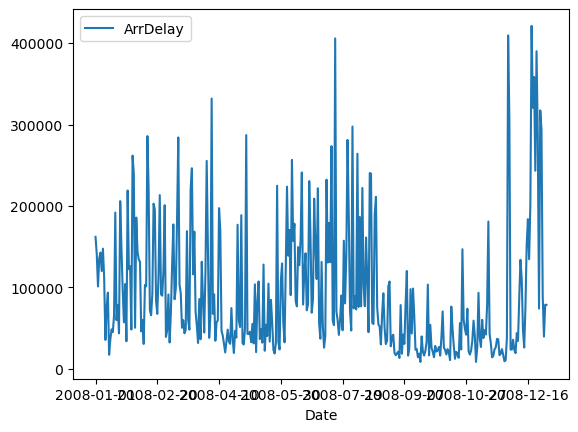

In [34]:
datesGroup.plot()

Observamos que los periodos de principio de verano y finales de año tienen más incidencias en los retrasos.

#### Análisis estadísticos de los retrasos en relación a la distancia

In [67]:
# Hacemos un dataset reducido con las columnas de distancia y el retraso del vuelo.
# El objetivo es saber si la distancia influye en el retraso del vuelo
df_distance = df_retrasos15Red3[['Distance','ArrDelay']] # filtramos el dataset
df_distance.head()

,Distance,ArrDelay
322516,3972,2461.0
686014,930,2453.0
839306,1085,1951.0
1009553,304,1707.0
1881639,1124,1655.0


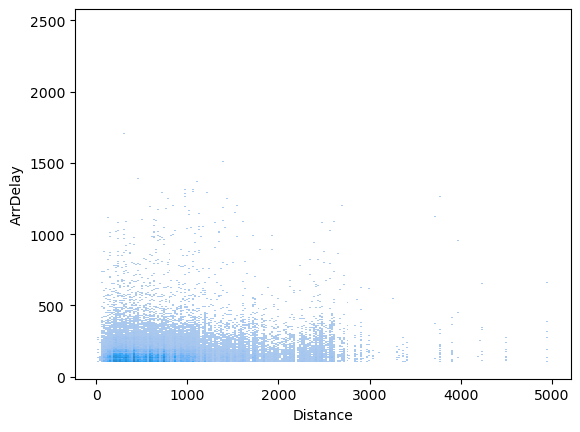

In [76]:
sns.histplot(data=df_distance, x="Distance", y="ArrDelay")
plt.show()

Podemos ver que los retrasos son más altos en distancias menores.

#### Valores faltantes por columna

In [78]:
df_retrasos15Red3.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 322516 to 41356
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Date               200000 non-null  object 
 2   UniqueCarrier      200000 non-null  object 
 3   ActualElapsedTime  200000 non-null  float64
 4   CRSElapsedTime     200000 non-null  float64
 5   ArrDelay           200000 non-null  float64
 6   DepDelay           200000 non-null  float64
 7   Origin             200000 non-null  object 
 8   Dest               200000 non-null  object 
 9   Distance           200000 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 20.8+ MB


#### Tabla con los retrasos acumulados por aerolínea

In [79]:
df_carrierDelay = df_retrasos15Red3[['UniqueCarrier','ArrDelay']]
df_carrierDelay.groupby(['UniqueCarrier']).sum()

,ArrDelay
UniqueCarrier,
9E,1054779.0
AA,3758715.0
AQ,3729.0
AS,502375.0
B6,1630943.0
CO,1865170.0
DL,1888087.0
EV,1743332.0
F9,183399.0


#### Rutas más largas y con más retrasos

In [80]:
df_distanceDelay = df_retrasos15Red3[['Origin','Dest','Distance','ArrDelay']]
df_distanceDelaySort = df_distanceDelay.sort_values(['Distance','ArrDelay'],ascending=False)
df_distanceDelaySort.head(15)

,Origin,Dest,Distance,ArrDelay
178838,HNL,EWR,4962,662.0
1418032,EWR,HNL,4962,388.0
872331,HNL,EWR,4962,317.0
1930578,HNL,EWR,4962,299.0
1256094,EWR,HNL,4962,287.0
1065857,EWR,HNL,4962,275.0
1923468,HNL,EWR,4962,264.0
1418425,EWR,HNL,4962,222.0
875499,EWR,HNL,4962,222.0
1066708,EWR,HNL,4962,221.0


La ruta entre New Jersey y Honolulu es la que más distancia cubre y más retrasos acumula.

### **Exercici 3**
Exporta el dataset net i amb les noves columnes a Excel.

In [86]:
df_retrasos15Red3.to_excel('C:/IT Academy/Sprint 3 Programació numèrica, dataframes i anàlisi estadístic/CdadesSprint3Tasca2.xlsx')